In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/V_codez Major Project/flipkart_com-ecommerce_sample.csv")
print(df.head())
print(df.columns)

                            uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/fabhomedecor-fabric-do...   
2  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/sicons-all-purpose-arn...   

                            product_name  \
0    Alisha Solid Women's Cycling Shorts   
1    FabHomeDecor Fabric Double Sofa Bed   
2                             AW Bellies   
3    Alisha Solid Women's Cycling Shorts   
4  Sicons All Purpose Arnica Dog Shampoo   

 

In [ ]:
df['product_name'] = df['product_name'].fillna("")
df['description'] = df['description'].fillna("")
df['text'] = df['product_name'] + " " + df['description']
data = df[['product_name', 'text']]

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english',max_features=500)
X = vectorizer.fit_transform(data['text']).toarray()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
linked = linkage(X_scaled, method='ward')

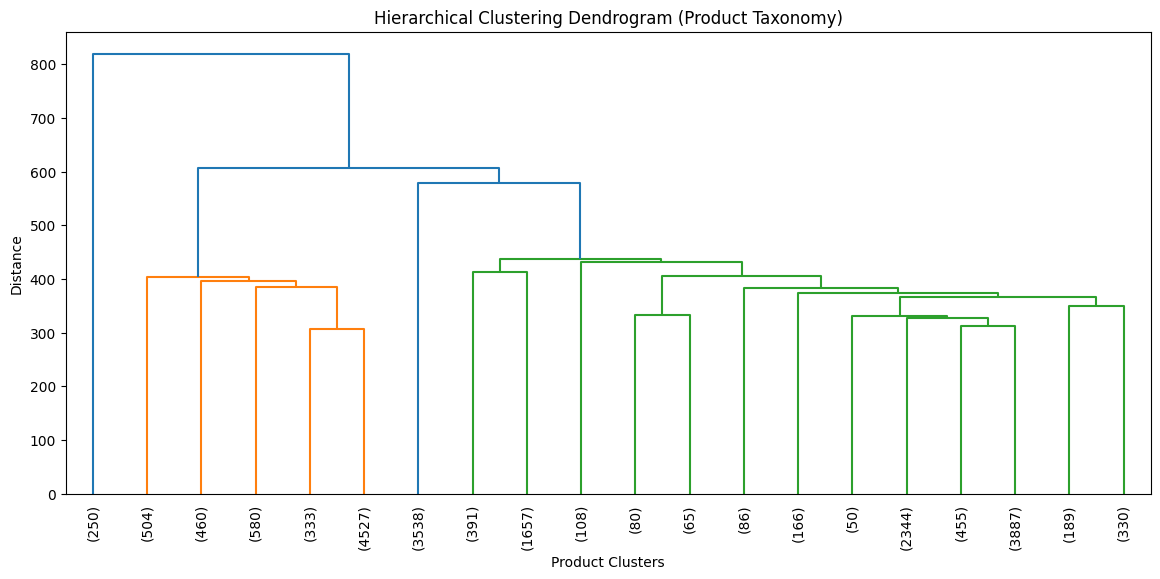

In [ ]:
plt.figure(figsize=(14, 6))
dendrogram(linked,truncate_mode='lastp',p=20,leaf_rotation=90,leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Product Taxonomy)")
plt.xlabel("Product Clusters")
plt.ylabel("Distance")
plt.show()

In [ ]:
num_clusters = 5

clusters = fcluster(linked, num_clusters, criterion='maxclust')

data['Cluster'] = clusters


/tmp/ipython-input-1187392735.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = clusters


In [ ]:
for i in range(1, num_clusters + 1):
    print(f"\nCluster {i}")
    print(data[data['Cluster'] == i]['product_name'].head(5))



Cluster 1
16866    TheLostPuppy Back Cover for Apple iPad Air 2
16867    TheLostPuppy Back Cover for Apple iPad Air 2
16869      TheLostPuppy Back Cover for Apple iPad Air
16875      TheLostPuppy Back Cover for Apple iPad Air
16877    TheLostPuppy Back Cover for Apple iPad Air 2
Name: product_name, dtype: object

Cluster 2
25                            Glus Wedding Lingerie Set
26    Veelys Shiny White Quad Roller Skates - Size 4...
68       Vermello Men Casual Brown Genuine Leather Belt
84    Redbag Eight Armed Goddess Sherawali Maa Showp...
88    Cobra Paris CO6394A1 Analog Watch  - For Men, ...
Name: product_name, dtype: object

Cluster 3
28                               FDT Women's Leggings
29                       Madcaps C38GR30 Men's Cargos
86           Discountgod Men's Checkered Casual Shirt
87     Silver Streak Men's Printed Casual Denim Shirt
336        Indistar Self Design Viscose Women's Stole
Name: product_name, dtype: object

Cluster 4
0                  Alisha Solid Wo

In [ ]:
data.to_csv("product_taxonomy_clusters.csv", index=False)
print("Clustered data saved successfully!")

Clustered data saved successfully!


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    adjusted_rand_score,
    normalized_mutual_info_score,
    silhouette_score
)
import numpy as np


In [ ]:
df['true_category'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0].replace('[','').replace('"','').strip())
le = LabelEncoder()
true_labels = le.fit_transform(df['true_category'])
predicted_labels = clusters

In [ ]:
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.0001


In [ ]:
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 3.0857361469072164e-08
Recall: 0.0001
F1 Score: 6.168923228599355e-08


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


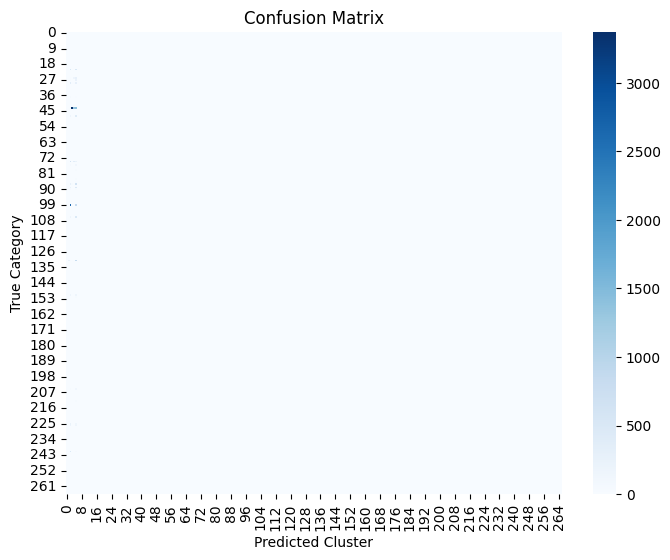

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Category")
plt.show()